In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch

In [3]:
RANDOM_SEED = 0
VALIDATE_SIZE = 0.2

In [4]:
import os
os.getcwd()

'C:\\Users\\Hasan\\Desktop\\Studium\\_Masterstudium\\_Semester4\\Fachpraktikum AI Deep Learning Lab\\Credit Card Fraud\\project_clone\\Credit-Card-Fraud-Detection\\notebooks'

In [5]:
import sys
sys.path.append("../src/main/")

# Load Data

In [6]:
from data_loader import MyDataLoader

loader = MyDataLoader()
df_head = loader.load_head('../data/creditcard_2023_head.csv')
df_head

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
# Load setups
setup = loader.load_setup('../data/setup_1.pkl')

loader.fit_data(setup['X_train'])
X_train = loader.transform_data(setup['X_train'])
X_test = loader.transform_data(setup['X_test'])

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (255883, 29)
Testing Data Shape: (56864, 29)


In [8]:
y_test = setup['y_test']
print("Testing Labels Data Shape:", y_test.shape)

Testing Labels Data Shape: (56864,)


### if wanted: additional min max scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### if wanted: Robust Scaling

In [339]:
from sklearn.preprocessing import RobustScaler

# Instantiate the RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Make the data for DL models

In [9]:
from sklearn.model_selection import train_test_split

# train // validate - no labels since they're all clean anyway
X_train_, X_validate_ = train_test_split(X_train, #X_train_scaled
                                       test_size=VALIDATE_SIZE, 
                                       random_state=RANDOM_SEED)

In [10]:
X_train_transformed = X_train_
X_validate_transformed = X_validate_
X_test_transformed = X_test # X_test_scaled

In [11]:
batch_size = 256

In [12]:
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_transformed)

# Create a dataset and data loader
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Convert validation data to PyTorch tensors
X_val_tensor = torch.Tensor(X_validate_transformed)

# Create a dataset and data loader for validation
val_dataset = TensorDataset(X_val_tensor, X_val_tensor)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size)

# Autoencoder / Denoising Autoencoder

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
            nn.Linear(4, 2),
            nn.ELU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [363]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ReLU(),
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ReLU(),
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 2),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ReLU(),
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 2),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.Tanh(),
            nn.Linear(input_dim, 16),
            nn.Tanh(),
            nn.Linear(16, 8),
            nn.Tanh(),
            nn.Linear(8, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Tanh()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 8),
            nn.Tanh(),
            nn.Linear(8, 16),
            nn.Tanh(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.Tanh(),
            nn.Linear(input_dim, 16),
            nn.Tanh(),
            nn.Linear(16, 8),
            nn.Tanh(),
            nn.Linear(8, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Tanh()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 8),
            nn.Tanh(),
            nn.Linear(8, 16),
            nn.Tanh(),
            nn.Linear(16, input_dim),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### higher bottleneck value is better! bottleneck = 4, F1 = 89

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### higher dim in bottleneck e.g. 8 is not better, F1 = 88

In [94]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### ReLU function very bad (probably because of vanishing gradient problem)

In [111]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ReLU(),
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### does not work well!

In [151]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### a bit worse than best (with minmax scaling)

In [162]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
            nn.Linear(4, 2),
            nn.ELU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### same as above

In [206]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
            nn.Linear(4, 2),
            nn.ELU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### best model so far with minmax scaling F1 = 88 (batch size 64)

In [269]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### tanh with minmax scaling and BCE and bs = 64 (F1 = 90)

In [295]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.Tanh(),
            nn.Linear(input_dim, 16),
            nn.Tanh(),
            nn.Linear(16, 8),
            nn.Tanh(),
            nn.Linear(8, 4),
            nn.Tanh(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.Tanh(),
            nn.Linear(8, 16),
            nn.Tanh(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### tanh with minmax scaling and MSE and bs = 128 (F1 = 90)

In [317]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.Tanh(),
            nn.Linear(input_dim, 16),
            nn.Tanh(),
            nn.Linear(16, 8),
            nn.Tanh(),
            nn.Linear(8, 4),
            nn.Tanh(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.Tanh(),
            nn.Linear(8, 16),
            nn.Tanh(),
            nn.Linear(16, input_dim),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### best model but with robust scaling (bad because large distribution of anomaly overlaps with normal data)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### best model with dropout (F1: 86%)

In [396]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim, dropout_rate=0.5):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(8, 4),
            nn.ELU(),
            nn.Dropout(dropout_rate)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### best model corrected: no identity layer anymore

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### For Denoising: 88% F1 score

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### Best AE with Batch normalization and higher learning rate (F1 = 90%)

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.BatchNorm1d(16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.BatchNorm1d(8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.BatchNorm1d(4),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.BatchNorm1d(8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.BatchNorm1d(16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Parameter influences
- Batch size: 
    - 1024 is bad, distributions come closer
    - 256 is also good
    - 64 is much better

In [14]:
# Parameters
input_dim = X_train_transformed.shape[1]

# Create the model
autoencoder = Autoencoder(input_dim)
autoencoder

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=29, out_features=16, bias=True)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=8, out_features=4, bias=True)
    (7): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ELU(alpha=1.0)
  )
  (decoder): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): Linear(in_features=8, out_features=16, bias=True)
    (4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=16, out_features=29, bias=True)
    (7): ELU(alph

In [15]:
# using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder = autoencoder.to(device)

#### Loss function
- if ReLU / ELU at the end of decoder, use MSE
- if Sigmoid at the end of decoder, use BCE. Note that data needs to bin normalized between 0 and 1!

In [298]:
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [16]:
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [120]:
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
criterion = nn.MSELoss()

#### Training loop

In [17]:
# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement before stopping
min_delta = 0.01  # Minimum change to qualify as an improvement
best_loss = float('inf')
counter = 0
epochs = 5

#### For Autoencoder

In [18]:
for epoch in range(epochs):
    # Training
    autoencoder.train()
    for data in train_loader:
        inputs, targets = data
        inputs, targets = inputs.to(device), targets.to(device)  # Move data to the same device as the model
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation
    autoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, targets = data
            inputs, targets = inputs.to(device), targets.to(device)  # Move data to the same device as the model
            outputs = autoencoder(inputs)
            val_loss += criterion(outputs, targets).item()

    val_loss /= len(val_loader)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.8f}, Val Loss: {val_loss:.8f}')

    # Check for improvement for early stopping
    if best_loss - val_loss > min_delta:
        best_loss = val_loss
        counter = 0
        # Save the best model
        torch.save(autoencoder.state_dict(), 'best_autoencoder.pth')
    else:
        counter += 1

    if counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs')
        break

Epoch [1/5], Loss: 0.28001282, Val Loss: 0.35183158
Epoch [2/5], Loss: 0.25372282, Val Loss: 0.33089320
Epoch [3/5], Loss: 0.25183216, Val Loss: 0.32245319
Epoch [4/5], Loss: 0.32733473, Val Loss: 0.31435260
Epoch [5/5], Loss: 0.28051227, Val Loss: 0.30568584


#### For Denoising Autoencoder

In [36]:
def add_noise(inputs, noise_factor=0.5):
    noise = torch.randn_like(inputs) * noise_factor
    return inputs + noise

In [37]:
noise_factor = 0.5

In [38]:
for epoch in range(epochs):
    # Training
    autoencoder.train()
    for data in train_loader:
        inputs, targets = data
        noisy_inputs = add_noise(inputs, noise_factor=noise_factor)
        noisy_inputs, targets = noisy_inputs.to(device), targets.to(device) 
        
        optimizer.zero_grad()
        outputs = autoencoder(noisy_inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation
    autoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, targets = data
            inputs, targets = inputs.to(device), targets.to(device)  # Move data to the same device as the model
            outputs = autoencoder(inputs)
            val_loss += criterion(outputs, targets).item()

    val_loss /= len(val_loader)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.8f}, Val Loss: {val_loss:.8f}')

    # Check for improvement for early stopping
    if best_loss - val_loss > min_delta:
        best_loss = val_loss
        counter = 0
        # Save the best model
        torch.save(autoencoder.state_dict(), 'best_denoising_autoencoder.pth')
    else:
        counter += 1

    if counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs')
        break

Epoch [1/100], Loss: 0.35970736, Val Loss: 0.28185704
Epoch [2/100], Loss: 0.21490629, Val Loss: 0.27307009
Epoch [3/100], Loss: 0.25144127, Val Loss: 0.26901099
Epoch [4/100], Loss: 0.35838196, Val Loss: 0.26565188
Epoch [5/100], Loss: 0.19893810, Val Loss: 0.26252040
Epoch [6/100], Loss: 0.20843959, Val Loss: 0.25830464
Epoch [7/100], Loss: 0.84807533, Val Loss: 0.25645751
Epoch [8/100], Loss: 0.25015125, Val Loss: 0.25378067
Epoch [9/100], Loss: 0.28919038, Val Loss: 0.25127301
Epoch [10/100], Loss: 0.36476690, Val Loss: 0.24863817
Epoch [11/100], Loss: 0.27532920, Val Loss: 0.24629116
Epoch [12/100], Loss: 0.24916819, Val Loss: 0.24383003
Epoch [13/100], Loss: 0.21050225, Val Loss: 0.24394217
Epoch [14/100], Loss: 0.25595444, Val Loss: 0.24227675
Epoch [15/100], Loss: 0.43399289, Val Loss: 0.24162616
Epoch [16/100], Loss: 0.32521319, Val Loss: 0.24238225
Epoch [17/100], Loss: 0.18314765, Val Loss: 0.24192966
Epoch [18/100], Loss: 0.34504306, Val Loss: 0.24053956
Epoch [19/100], Los

### Train reconstruction loss

In [43]:
X_train_tensor = X_train_tensor.to(device)

# Get the model's reconstruction of the test set
autoencoder.eval()
with torch.no_grad():
    reconstructions = autoencoder(X_train_tensor).cpu().numpy()

# Calculate the MSE reconstruction loss per row
mse = np.mean(np.power(X_train_tensor.cpu().numpy() - reconstructions, 2), axis=1)

ValueError: operands could not be broadcast together with shapes (255883,29) (204706,29) 

#### based on quantile

In [20]:
threshold = np.quantile(mse, 0.90)
threshold

0.481120765209198

#### based on mean and std

In [24]:
# Assuming mse is a numpy array containing the MSE for each row in your dataset
mse_mean = np.mean(mse)
mse_std = np.std(mse)

# Setting the threshold to mean + 2 sigma
threshold = mse_mean + mse_std

print("Threshold for anomaly detection:", threshold)

Threshold for anomaly detection: 4.7786856


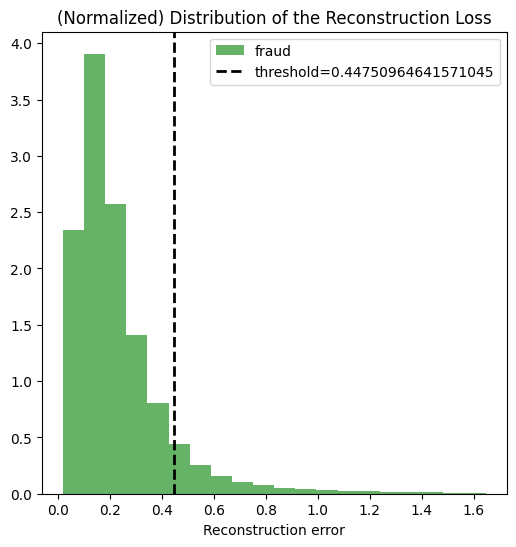

In [22]:
# Plotting the distribution of reconstruction loss
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(mse[mse < np.quantile(mse, 0.99)], bins=20, density=True, label="fraud", alpha=.6, color="green")
plt.axvline(threshold, color='black', linestyle='dashed', linewidth=2, label=f'threshold={threshold}')
plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.xlabel("Reconstruction error")
plt.legend()
plt.show()

### Testing

In [31]:
# Convert the transformed test set to a PyTorch tensor
X_test_tensor = torch.Tensor(X_test_transformed).to(device)

In [32]:
# Get the model's reconstruction of the test set
autoencoder.eval()
with torch.no_grad():
    reconstructions = autoencoder(X_test_tensor).cpu().numpy()

In [33]:
# Calculate the MSE reconstruction loss per row
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [34]:
clean = mse[y_test == 0]
fraud = mse[y_test == 1]

### Reconstruction loss

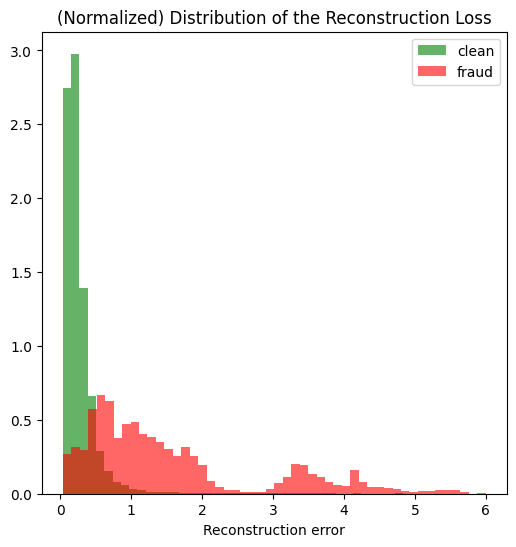

In [35]:
x_clip = 6 # was 10 / 0.050

# Plotting the distribution of reconstruction loss
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(clean[clean <= x_clip], bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud[fraud <= x_clip], bins=50, density=True, label="fraud", alpha=.6, color="red")
plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.xlabel("Reconstruction error")
plt.legend()
plt.show()

C:\Users\Hasan\AppData\Local\Temp\ipykernel_24252\1735040835.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean[clean <= 10], bins=50, label = 'Normal')
C:\Users\Hasan\AppData\Local\Temp\ipykernel_24252\1735040835.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud[fraud <= 10], bin

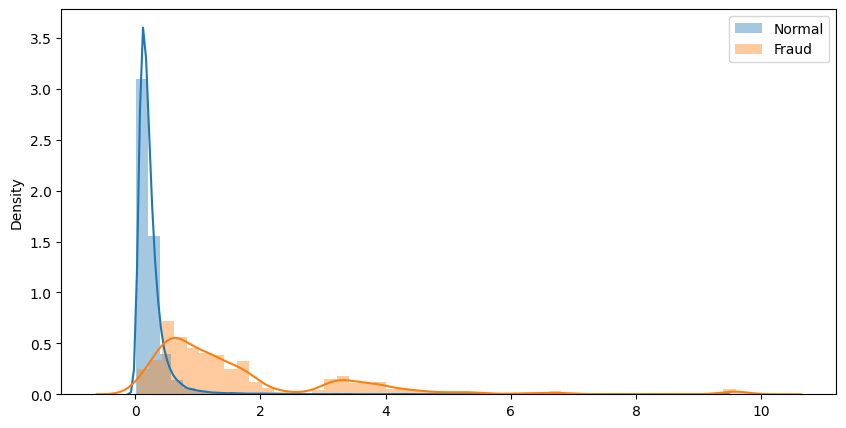

In [32]:
plt.figure(figsize = (10,5))
sns.distplot(clean[clean <= 10], bins=50, label = 'Normal')
sns.distplot(fraud[fraud <= 10], bins=50, label = 'Fraud')
plt.legend()
plt.show()

### Latent space visualization

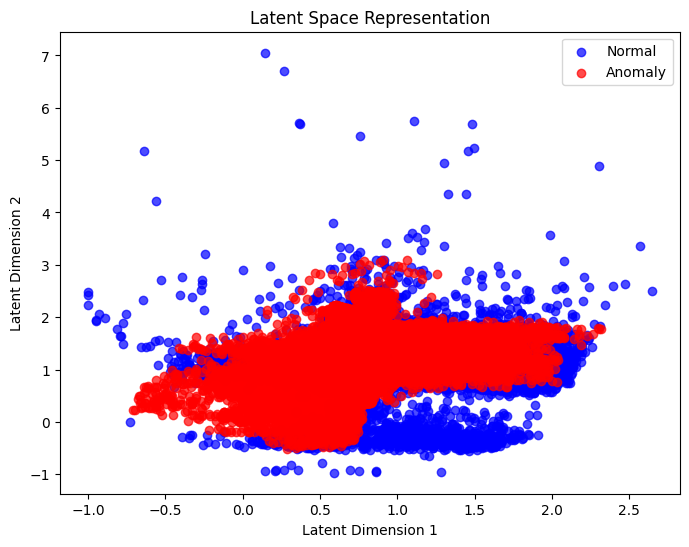

In [33]:
import matplotlib.pyplot as plt
import numpy as np

X_test_tensor = torch.Tensor(X_test_transformed).to(device)

autoencoder.eval()
with torch.no_grad():
    # Get the latent space representations
    latent_space = autoencoder.encoder(X_test_tensor).cpu().detach().numpy()

# Separate the embeddings into normal and anomalous
latent_normal = latent_space[y_test == 0]
latent_anomaly = latent_space[y_test == 1]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(latent_normal[:, 0], latent_normal[:, 1], alpha=0.7, label='Normal', color='blue')
plt.scatter(latent_anomaly[:, 0], latent_anomaly[:, 1], alpha=0.7, label='Anomaly', color='red')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Representation')
plt.legend()
plt.show()


## Threshold 1: where max fraud begins

In [32]:
import numpy as np

# Assuming 'clean' and 'fraud' are the arrays containing your MSE values

# Define the number of bins
num_bins = 50

# Calculate histograms
clean_counts, clean_bins = np.histogram(clean[clean <= 10], bins=num_bins)
fraud_counts, fraud_bins = np.histogram(fraud[fraud <= 10], bins=num_bins)

# Find the bin with the most elements for clean data
max_clean_bin_index = np.argmax(clean_counts)
max_clean_bin_range = (clean_bins[max_clean_bin_index], clean_bins[max_clean_bin_index + 1])

# Find the bin with the most elements for fraud data
max_fraud_bin_index = np.argmax(fraud_counts)
max_fraud_bin_range = (fraud_bins[max_fraud_bin_index], fraud_bins[max_fraud_bin_index + 1])

print("Max clean bin range:", max_clean_bin_range)
print("Max fraud bin range:", max_fraud_bin_range)

Max clean bin range: (0.0127206355629393, 0.20319936467687616)
Max fraud bin range: (0.4337258562368329, 0.6320970852336969)


In [380]:
threshold = max_fraud_bin_range[0]
#threshold = max_clean_bin_range[1]
threshold

1.6779619642376185

## Threshold 2: Brute-Forcing (Threshold that leads to best F1)

In [129]:
import numpy as np
from sklearn.metrics import f1_score

best_f1 = 0
best_threshold = 0
#c = 0

# Iterate over a range of possible thresholds
for threshold in np.linspace(min(mse), max(mse), num=1000):
    #print(c)
    #c = c + 1
    
    # Predict anomalies based on the threshold
    y_pred = (mse > threshold).astype(int)
    
    # Calculate F1 score
    current_f1 = f1_score(y_test, y_pred)
    
    # Update the best threshold if current F1 score is higher
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

Best Threshold: 0.41418666565293916
Best F1 Score: 0.8973011113071089


In [130]:
threshold = best_threshold

## Threshold 3: manually through (visual) inspection

In [51]:
# Manually:
# threshold = 0.7

### Classification

In [39]:
outliers = mse > threshold
print("Number of outliers: ", sum(outliers))

Number of outliers:  1607


In [40]:
y_pred = outliers
# Convert predictions to match y_test labels (1 for anomalies, 0 for normal)
y_pred = y_pred.astype(int)

In [41]:
len(mse)

56864

Basic Evaluation Metrics:
Precision: 0.9626633478531424
Recall: 0.05441052335396736
F1-Score: 0.10299943406904356
MCC: 0.15780086475712443


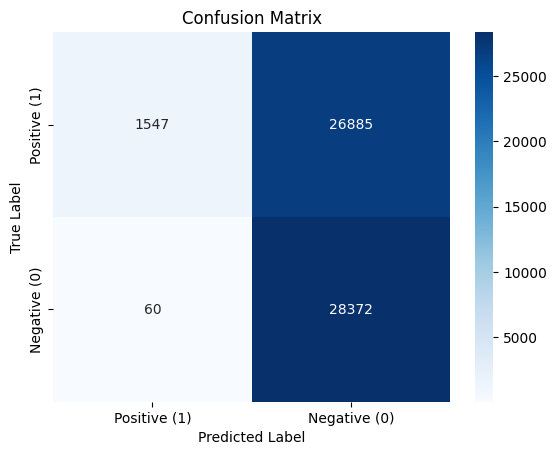

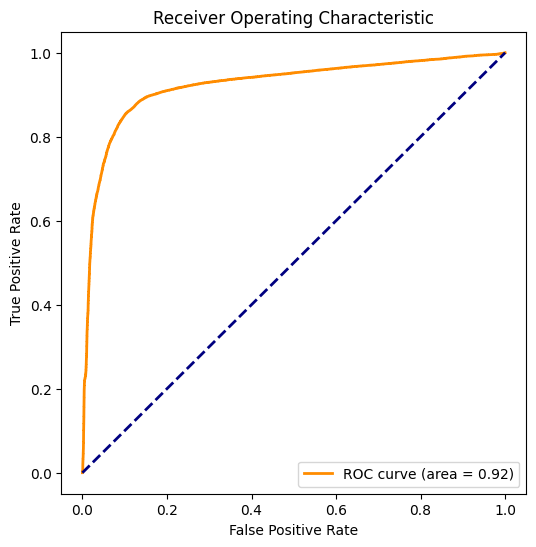

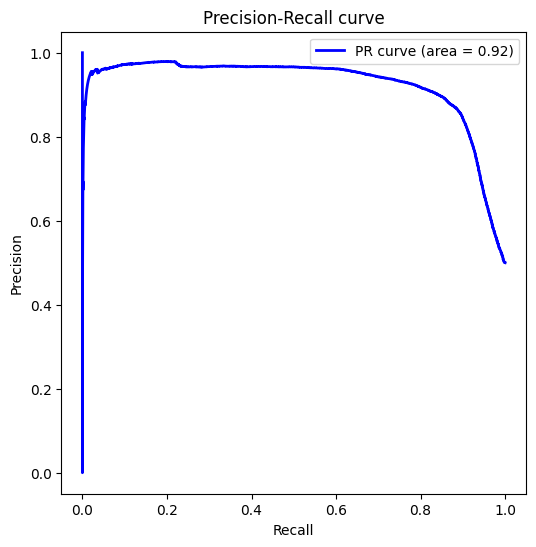

              precision    recall  f1-score   support

           0       0.51      1.00      0.68     28432
           1       0.96      0.05      0.10     28432

    accuracy                           0.53     56864
   macro avg       0.74      0.53      0.39     56864
weighted avg       0.74      0.53      0.39     56864



{'precision': 0.9626633478531424,
 'recall': 0.05441052335396736,
 'f1_score': 0.10299943406904356,
 'mcc': 0.15780086475712443}

In [42]:
from evaluation import ModelEvaluator

evaluator = ModelEvaluator(y_test, y_pred, mse)
evaluator.full_report()

### Explainability

In [319]:
import torch
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Function to evaluate model performance (precision, recall, F1 score)
def evaluate_model(autoencoder, data, labels, threshold, device):
    data_tensor = torch.Tensor(data).to(device)
    reconstructed = autoencoder(data_tensor).detach()
    reconstructed = reconstructed.cpu().numpy()  # Move to CPU before converting to NumPy
    reconstruction_error = np.mean((data - reconstructed) ** 2, axis=1)
    predictions = reconstruction_error > threshold
    return {
        "reconstruction_error": np.mean(reconstruction_error),
        "precision": precision_score(labels, predictions),
        "recall": recall_score(labels, predictions),
        "f1_score": f1_score(labels, predictions)
    }


def feature_shuffling_impact(autoencoder, X_test, y_test, threshold, device):
    original_scores = evaluate_model(autoencoder, X_test, y_test, threshold, device)
    feature_importance = {}

    for i in range(X_test.shape[1]):  # Iterate over each feature
        print("Feature: ", i)
        all_shuffled_scores = []
        for _ in range(10):
            X_test_shuffled = X_test.copy()
            np.random.shuffle(X_test_shuffled[:, i])  # Shuffle feature i

            shuffled_scores = evaluate_model(autoencoder, X_test_shuffled, y_test, threshold, device)
            all_shuffled_scores.append(shuffled_scores)
        
        # Convert list of dictionaries to a DataFrame for easier processing
        df_shuffled_scores = pd.DataFrame(all_shuffled_scores)

        feature_importance[i] = {
            "change_in_reconstruction_error": -(original_scores["reconstruction_error"] - df_shuffled_scores['reconstruction_error'].mean()),
            "change_in_precision": -(original_scores["precision"] - df_shuffled_scores['precision'].mean()),
            "change_in_recall": -(original_scores["recall"] - df_shuffled_scores['recall'].mean()),
            "change_in_f1": -(original_scores["f1_score"] - df_shuffled_scores['f1_score'].mean())
        }

    return feature_importance

In [320]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
feature_importance = feature_shuffling_impact(autoencoder, X_test, y_test, threshold, device)

Feature:  0
Feature:  1
Feature:  2
Feature:  3
Feature:  4
Feature:  5
Feature:  6
Feature:  7
Feature:  8
Feature:  9
Feature:  10
Feature:  11
Feature:  12
Feature:  13
Feature:  14
Feature:  15
Feature:  16
Feature:  17
Feature:  18
Feature:  19
Feature:  20
Feature:  21
Feature:  22
Feature:  23
Feature:  24
Feature:  25
Feature:  26
Feature:  27
Feature:  28


In [321]:
feature_importance

{0: {'change_in_reconstruction_error': 0.026301014518965493,
  'change_in_precision': -0.053623768235800506,
  'change_in_recall': 0.015763927968486136,
  'change_in_f1': -0.019413774030119568},
 1: {'change_in_reconstruction_error': 0.0057747640281538,
  'change_in_precision': -0.04383495236703239,
  'change_in_recall': 0.008954698930782379,
  'change_in_f1': -0.017555457983070455},
 2: {'change_in_reconstruction_error': 0.002723760563108746,
  'change_in_precision': -0.031541185333245014,
  'change_in_recall': 0.010365081598199266,
  'change_in_f1': -0.01054799253814398},
 3: {'change_in_reconstruction_error': -0.003720317246208582,
  'change_in_precision': -0.028964031440159355,
  'change_in_recall': 0.004846651660101231,
  'change_in_f1': -0.011948387356778944},
 4: {'change_in_reconstruction_error': 0.007273674274692832,
  'change_in_precision': -0.03688793060745077,
  'change_in_recall': 0.011803601575689271,
  'change_in_f1': -0.01259020477204209},
 5: {'change_in_reconstruction

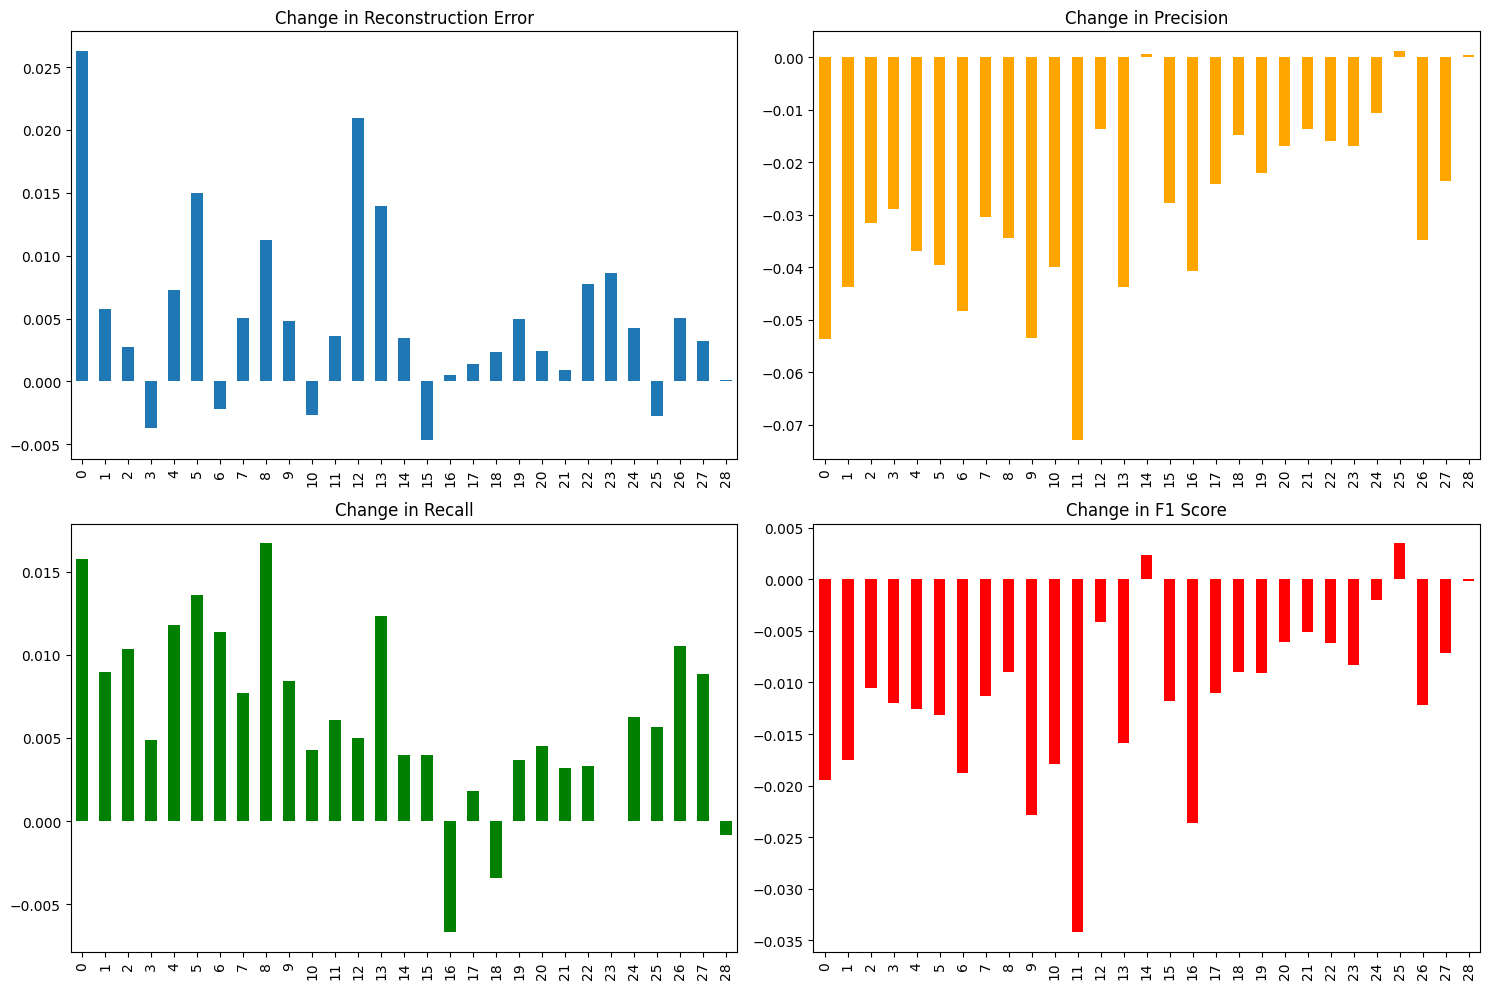

In [322]:
# Convert to DataFrame for easy plotting
df = pd.DataFrame.from_dict(feature_importance, orient='index')

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
df['change_in_reconstruction_error'].plot(kind='bar', ax=axes[0, 0], title='Change in Reconstruction Error')
df['change_in_precision'].plot(kind='bar', ax=axes[0, 1], color='orange', title='Change in Precision')
df['change_in_recall'].plot(kind='bar', ax=axes[1, 0], color='green', title='Change in Recall')
df['change_in_f1'].plot(kind='bar', ax=axes[1, 1], color='red', title='Change in F1 Score')

plt.tight_layout()
plt.show()

# Variational Autoencoder

### last layer: Sigmoid (does not work well at all)

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

class VariationalAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(VariationalAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU()
        )
        
        self.mean_layer = nn.Linear(8, 4)  # Mean of the latent space
        self.logvar_layer = nn.Linear(8, 4)  # Standard deviation of the latent space

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid() # nn.Sigmoid() / nn.ELU()
        )

    def encode(self, x):
        x = self.encoder(x)
        mean, logvar = self.mean_layer(x), self.logvar_layer(x)
        return mean, logvar

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, log_var = self.encode(x.view(-1, input_dim))
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var

### BEST last layer: ELU (85% F1)

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

class VariationalAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(VariationalAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU()
        )
        
        self.mean_layer = nn.Linear(8, 4)  # Mean of the latent space
        self.logvar_layer = nn.Linear(8, 4)  # Standard deviation of the latent space

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU() # nn.Sigmoid() / nn.ELU()
        )

    def encode(self, x):
        x = self.encoder(x)
        mean, logvar = self.mean_layer(x), self.logvar_layer(x)
        return mean, logvar

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, log_var = self.encode(x.view(-1, input_dim))
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var

### all activation functions: LeakyReLU (84%)

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim

class VariationalAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(VariationalAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.LeakyReLU(),
            nn.Linear(16, 8),
            nn.LeakyReLU()
        )
        
        self.mean_layer = nn.Linear(8, 4)  # Mean of the latent space
        self.logvar_layer = nn.Linear(8, 4)  # Standard deviation of the latent space

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.LeakyReLU(),
            nn.Linear(8, 16),
            nn.LeakyReLU(),
            nn.Linear(16, input_dim),
            nn.LeakyReLU() # nn.Sigmoid() / nn.ELU()
        )

    def encode(self, x):
        x = self.encoder(x)
        mean, logvar = self.mean_layer(x), self.logvar_layer(x)
        return mean, logvar

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, log_var = self.encode(x.view(-1, input_dim))
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var

### bottleneck dimension 2: F1 84%

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim

class VariationalAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(VariationalAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU()
        )
        
        self.mean_layer = nn.Linear(4, 2)  # Mean of the latent space
        self.logvar_layer = nn.Linear(4, 2)  # Standard deviation of the latent space

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU() # nn.Sigmoid() / nn.ELU()
        )

    def encode(self, x):
        x = self.encoder(x)
        mean, logvar = self.mean_layer(x), self.logvar_layer(x)
        return mean, logvar

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, log_var = self.encode(x.view(-1, input_dim))
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var

### best with batch normalization (F1 = 85%)

In [97]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(VariationalAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.BatchNorm1d(16),  # Batch normalization layer
            nn.ELU(),
            nn.Linear(16, 8),
            nn.BatchNorm1d(8),   # Batch normalization layer
            nn.ELU()
        )
        
        self.mean_layer = nn.Linear(8, 4)  # Mean of the latent space
        self.logvar_layer = nn.Linear(8, 4)  # Standard deviation of the latent space

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.BatchNorm1d(8),   # Batch normalization layer
            nn.ELU(),
            nn.Linear(8, 16),
            nn.BatchNorm1d(16),  # Batch normalization layer
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()  # or nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        mean, logvar = self.mean_layer(x), self.logvar_layer(x)
        return mean, logvar

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var


In [98]:
# Input dimension
input_dim = X_train_transformed.shape[1]

# Create the model
vae = VariationalAutoencoder(input_dim)

In [99]:
# Define optimizer and modified loss function
#optimizer = optim.Adam(vae.parameters(), lr=0.001)
optimizer = optim.Adam(vae.parameters(), lr=0.01)

### Loss function
- if Sigmoid() at the end, use BCE()
- if not, use MSE()

In [26]:
# Loss function
def loss_function(recon_x, x, mu, log_var):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, input_dim), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

In [100]:
def loss_function(recon_x, x, mu, log_var):
    MSE = nn.functional.mse_loss(recon_x, x.view(-1, input_dim), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return MSE + KLD

In [101]:
# using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = vae.to(device)

In [102]:
# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement before stopping
min_delta = 0.01  # Minimum change to qualify as an improvement
best_loss = float('inf')
counter = 0

In [103]:
for epoch in range(epochs):
    vae.train()
    train_loss = 0
    for inputs, _ in train_loader:  # _ since inputs are the same as targets
        inputs = inputs.to(device)
        optimizer.zero_grad()
        recon_batch, mu, log_var = vae(inputs)
        loss = loss_function(recon_batch, inputs, mu, log_var)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    train_loss /= len(train_loader.dataset)

    # Validation
    vae.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, _ in val_loader:  # _ since inputs are the same as targets
            inputs = inputs.to(device)
            recon_batch, mu, log_var = vae(inputs)
            val_loss += loss_function(recon_batch, inputs, mu, log_var).item()

    val_loss /= len(val_loader.dataset)
    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.8f}, Val Loss: {val_loss:.8f}')

    # Early stopping check
    if best_loss - val_loss > min_delta:
        best_loss = val_loss
        counter = 0
        torch.save(vae.state_dict(), 'best_vae.pth')
    else:
        counter += 1

    if counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs')
        break

Epoch [1/100], Train Loss: 14.94443686, Val Loss: 13.90956332
Epoch [2/100], Train Loss: 14.50869331, Val Loss: 13.69759355
Epoch [3/100], Train Loss: 14.37013337, Val Loss: 13.62130762
Epoch [4/100], Train Loss: 14.25233668, Val Loss: 13.60860112
Epoch [5/100], Train Loss: 14.16636026, Val Loss: 13.54337635
Epoch [6/100], Train Loss: 14.11195282, Val Loss: 13.48157824
Epoch [7/100], Train Loss: 14.09093020, Val Loss: 13.47941464
Epoch [8/100], Train Loss: 13.99359161, Val Loss: 13.43610346
Epoch [9/100], Train Loss: 13.97579267, Val Loss: 13.48349082
Epoch [10/100], Train Loss: 13.95121490, Val Loss: 13.42395135
Epoch [11/100], Train Loss: 13.96738934, Val Loss: 13.41326527
Epoch [12/100], Train Loss: 13.90818939, Val Loss: 13.49347520
Epoch [13/100], Train Loss: 13.90737501, Val Loss: 13.40680502
Epoch [14/100], Train Loss: 13.85937274, Val Loss: 13.39079492
Epoch [15/100], Train Loss: 13.85647094, Val Loss: 13.37815369
Epoch [16/100], Train Loss: 13.88477511, Val Loss: 13.42242180
E

### Testing

In [104]:
X_test_tensor = torch.Tensor(X_test_transformed).to(device)

In [105]:
vae.eval()
with torch.no_grad():
    reconstructions, _, _ = vae(X_test_tensor)  # Ignore mean and logvar for now
    reconstructions = reconstructions.cpu().numpy()

In [106]:
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [107]:
clean = mse[y_test == 0]
fraud = mse[y_test == 1]

### Reconstruction loss

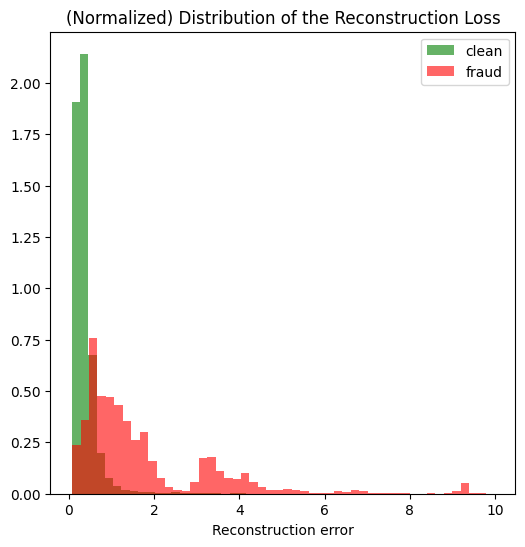

In [108]:
x_clip = 10 # was 10 / 0.050

# Plotting the distribution of reconstruction loss
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(clean[clean <= x_clip], bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud[fraud <= x_clip], bins=50, density=True, label="fraud", alpha=.6, color="red")
plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.xlabel("Reconstruction error")
plt.legend()
plt.show()

### Latent space visualization
- **does not make a lot of sense if bottleneck dimension is not 2**
- (we can see that the VAE does not do a good job of separating the two distributions)

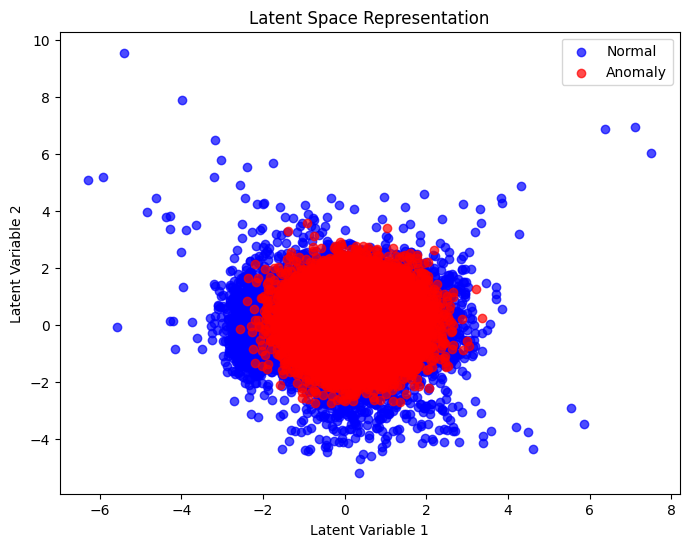

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Move data to the same device as the model
X_test_tensor = X_test_tensor.to(device)

vae.eval()
with torch.no_grad():
    # Get the mean and log variance of the latent space
    mu, log_var = vae.encode(X_test_tensor)
    z = vae.reparameterize(mu, log_var)

# Convert the latent space tensors to NumPy arrays
z = z.cpu().numpy()
mu = mu.cpu().numpy()
log_var = log_var.cpu().numpy()

# Separate the embeddings into normal and anomalous
z_normal = z[y_test == 0]
z_anomaly = z[y_test == 1]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(z_normal[:, 0], z_normal[:, 1], alpha=0.7, label='Normal', color='blue')
plt.scatter(z_anomaly[:, 0], z_anomaly[:, 1], alpha=0.7, label='Anomaly', color='red')
plt.xlabel('Latent Variable 1')
plt.ylabel('Latent Variable 2')
plt.title('Latent Space Representation')
plt.legend()
plt.show()

## setting the threshold

In [110]:
import numpy as np
from sklearn.metrics import f1_score

best_f1 = 0
best_threshold = 0
#c = 0

# Iterate over a range of possible thresholds
for threshold in np.linspace(min(mse), max(mse), num=1000):
    #print(c)
    #c = c + 1
    
    # Predict anomalies based on the threshold
    y_pred = (mse > threshold).astype(int)
    
    # Calculate F1 score
    current_f1 = f1_score(y_test, y_pred)
    
    # Update the best threshold if current F1 score is higher
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

Best Threshold: 0.47917857479473164
Best F1 Score: 0.8518657608139018


In [111]:
threshold = best_threshold

### Classification

In [112]:
outliers = mse > threshold
print("Number of outliers: ", sum(outliers))

y_pred = outliers
# Convert predictions to match y_test labels (1 for anomalies, 0 for normal)
y_pred = y_pred.astype(int)

Number of outliers:  30150


In [113]:
from evaluation import ModelEvaluator

evaluator = ModelEvaluator(y_test, y_pred, mse)
evaluator.full_report()

AttributeError: 'ModelEvaluator' object has no attribute 'basic_evaluation'

In [114]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    matthews_corrcoef,
    confusion_matrix
)

class ModelEvaluator:
    def __init__(self, y_true, y_pred, y_scores=None):
        self.y_true = y_true
        self.y_pred = y_pred
        self.y_scores = y_scores

    def basic_report(self):
        precision = precision_score(self.y_true, self.y_pred)
        recall = recall_score(self.y_true, self.y_pred)
        f1 = f1_score(self.y_true, self.y_pred)
        mcc = matthews_corrcoef(self.y_true, self.y_pred)

        print("Basic Evaluation Metrics:")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-Score: {f1}")
        print(f"MCC: {mcc}")

        return {
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
            "mcc": mcc
        }

    def plot_confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)

        # Reorder the confusion matrix
        cm_reordered = [[cm[1][1], cm[1][0]], [cm[0][1], cm[0][0]]]

        sns.heatmap(cm_reordered, annot=True, fmt="d", cmap='Blues',
                    xticklabels=['Positive (1)', 'Negative (0)'],
                    yticklabels=['Positive (1)', 'Negative (0)'])
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    def plot_roc_curve(self):
        fpr, tpr, _ = roc_curve(self.y_true, self.y_scores)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

    def plot_precision_recall_curve(self):
        precision, recall, _ = precision_recall_curve(self.y_true, self.y_scores)
        pr_auc = auc(recall, precision)

        plt.figure(figsize=(6, 6))
        plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall curve')
        plt.legend(loc="upper right")
        plt.show()

    def full_report(self):
        metrics = self.basic_report()
        self.plot_confusion_matrix()
        if self.y_scores is not None:
            self.plot_roc_curve()
            self.plot_precision_recall_curve()
        print(classification_report(self.y_true, self.y_pred))

        return metrics


Basic Evaluation Metrics:
Precision: 0.8275953565505805
Recall: 0.877602701181767
F1-Score: 0.8518657608139018
MCC: 0.6960523921674809


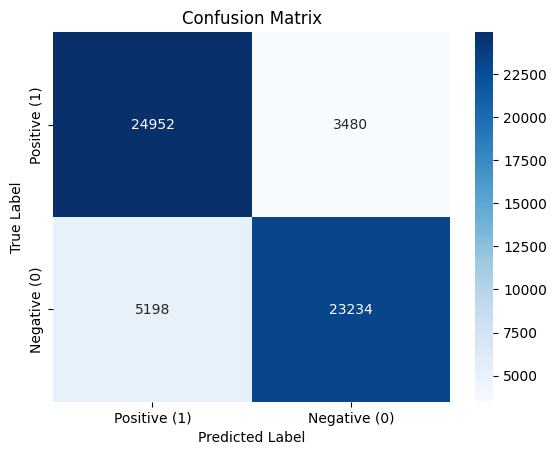

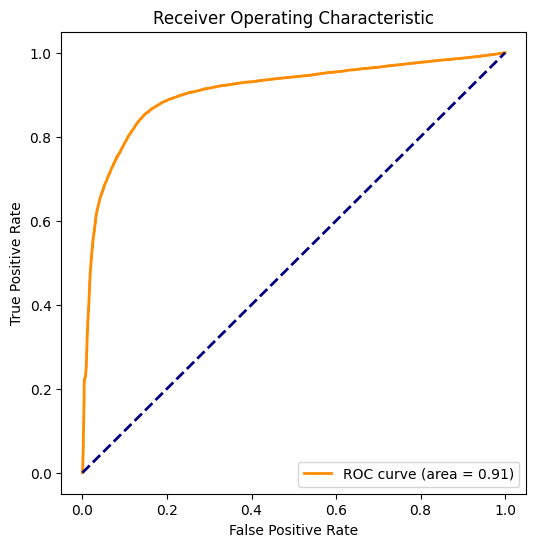

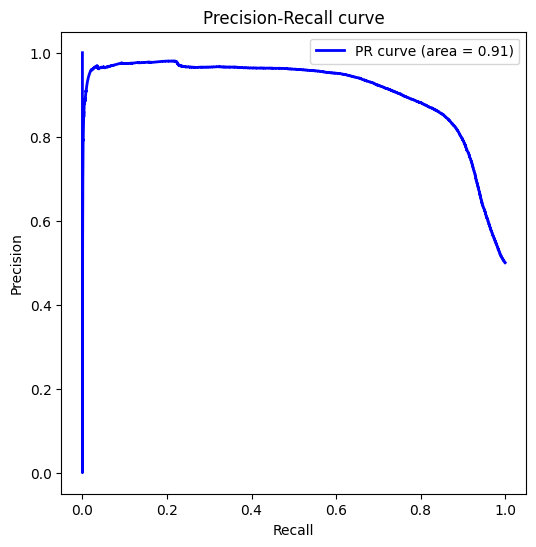

              precision    recall  f1-score   support

           0       0.87      0.82      0.84     28432
           1       0.83      0.88      0.85     28432

    accuracy                           0.85     56864
   macro avg       0.85      0.85      0.85     56864
weighted avg       0.85      0.85      0.85     56864



{'precision': 0.8275953565505805,
 'recall': 0.877602701181767,
 'f1_score': 0.8518657608139018,
 'mcc': 0.6960523921674809}

In [115]:
evaluator = ModelEvaluator(y_test, y_pred, mse)
evaluator.full_report()

# GANs

In [13]:
import torch
import torch.nn as nn

# Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(32, 16),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(inplace=True),
            nn.Linear(16, 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, output_dim),
            nn.Tanh()  # Tanh activation to output values between -1 and 1
        )

    def forward(self, z):
        return self.model(z)

In [20]:
# Model initialization
input_dim = X_train_transformed.shape[1]  # Input dimension for real data
latent_dim = 100  # Latent dimension for generator input

generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

In [21]:
# using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = generator.to(device)
discriminator = discriminator.to(device)

In [22]:
generator

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=16, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=32, out_features=29, bias=True)
    (5): Tanh()
  )
)

In [23]:
discriminator

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=29, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [24]:
# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [25]:
# Loss function
adversarial_loss = nn.BCELoss()

### without early stopping

In [ ]:
# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    for i, (real_data, _) in enumerate(train_loader):
        # Real data
        real = torch.FloatTensor(real_data).to(device)
        real_labels = torch.ones((real.size(0), 1)).to(device)

        # Generate fake data
        z = torch.randn((real.size(0), latent_dim)).to(device)
        fake = generator(z)
        fake_labels = torch.zeros((real.size(0), 1)).to(device)

        # Train discriminator
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real), real_labels)
        fake_loss = adversarial_loss(discriminator(fake.detach()), fake_labels)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # Train generator
        optimizer_G.zero_grad()
        g_loss = adversarial_loss(discriminator(fake), real_labels)
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch {epoch}/{num_epochs}  D loss: {d_loss.item()}  G loss: {g_loss.item()}")

### with early stopping

In [26]:
# Early stopping parameters
patience = 10
min_delta = 0.0001
best_loss = float('inf')
counter = 0

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    for i, (real_data, _) in enumerate(train_loader):
        # Real data
        real = torch.FloatTensor(real_data).to(device)
        real_labels = torch.ones((real.size(0), 1)).to(device)

        # Generate fake data
        z = torch.randn((real.size(0), latent_dim)).to(device)
        fake = generator(z)
        fake_labels = torch.zeros((real.size(0), 1)).to(device)

        # Train discriminator
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real), real_labels)
        fake_loss = adversarial_loss(discriminator(fake.detach()), fake_labels)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # Train generator
        optimizer_G.zero_grad()
        g_loss = adversarial_loss(discriminator(fake), real_labels)
        g_loss.backward()
        optimizer_G.step()

    # Calculate the average loss for the epoch (if you have a validation set, use validation loss instead)
    avg_loss = (d_loss.item() + g_loss.item()) / 2

    # Print the losses
    print(f"Epoch {epoch}/{num_epochs}  D loss: {d_loss.item()}  G loss: {g_loss.item()}")

    # Check for early stopping
    loss_change = best_loss - avg_loss
    if loss_change > min_delta:
        best_loss = avg_loss
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print(f"Early stopping triggered at epoch {epoch}")
        break

Epoch 0/200  D loss: 0.6906391382217407  G loss: 0.7016773223876953
Epoch 1/200  D loss: 0.6919198036193848  G loss: 0.688583493232727
Epoch 2/200  D loss: 0.6904230713844299  G loss: 0.7136763334274292
Epoch 3/200  D loss: 0.689167857170105  G loss: 0.706138551235199
Epoch 4/200  D loss: 0.6923841238021851  G loss: 0.6880653500556946
Epoch 5/200  D loss: 0.6904852390289307  G loss: 0.7030126452445984
Epoch 6/200  D loss: 0.6948236227035522  G loss: 0.6974517703056335
Epoch 7/200  D loss: 0.6933586001396179  G loss: 0.6891971826553345
Epoch 8/200  D loss: 0.6949019432067871  G loss: 0.6866008639335632
Epoch 9/200  D loss: 0.6939212083816528  G loss: 0.6902657747268677
Epoch 10/200  D loss: 0.6939557194709778  G loss: 0.6941897869110107
Epoch 11/200  D loss: 0.6923149824142456  G loss: 0.695421040058136
Early stopping triggered at epoch 11


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Assuming discriminator is the trained discriminator model from your GAN
# Convert test set to a PyTorch tensor
X_test_tensor = torch.Tensor(X_test_transformed).to(device)

# Evaluate the discriminator's output on the test data
discriminator.eval()
with torch.no_grad():
    realness_scores = discriminator(X_test_tensor).cpu().numpy()

In [39]:
realness_scores = np.reshape(realness_scores, -1)

In [40]:
import numpy as np
from sklearn.metrics import f1_score

best_f1 = 0
best_threshold = 0
#c = 0

# Iterate over a range of possible thresholds
for threshold in np.linspace(min(realness_scores), max(realness_scores), num=1000):
    #print(c)
    #c = c + 1
    
    # Predict anomalies based on the threshold
    y_pred = (realness_scores > threshold).astype(int)
    
    # Calculate F1 score
    current_f1 = f1_score(y_test, y_pred)
    
    # Update the best threshold if current F1 score is higher
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

Best Threshold: 0.4775666892528534
Best F1 Score: 0.6666744826777654


In [41]:
threshold = best_threshold

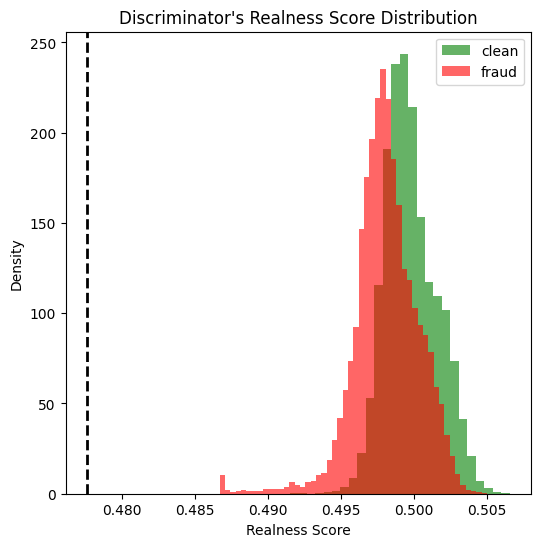

In [42]:
# Plotting
plt.figure(figsize=(6,6))
plt.hist(realness_scores[y_test == 0], bins=50, density=True, label="clean", alpha=.6, color="green")
plt.hist(realness_scores[y_test == 1], bins=50, density=True, label="fraud", alpha=.6, color="red")
plt.axvline(threshold, color='black', linestyle='dashed', linewidth=2)
plt.title("Discriminator's Realness Score Distribution")
plt.xlabel("Realness Score")
plt.ylabel("Density")
plt.legend()
plt.show()

In [43]:
outliers = realness_scores > threshold
print("Number of outliers: ", sum(outliers))

Number of outliers:  56863


In [44]:
y_pred = outliers
# Convert predictions to match y_test labels (1 for anomalies, 0 for normal)
y_pred = y_pred.astype(int)

Basic Evaluation Metrics:
Precision: 0.5000087930640311
Recall: 1.0
F1-Score: 0.6666744826777654
MCC: 0.004193581770060594


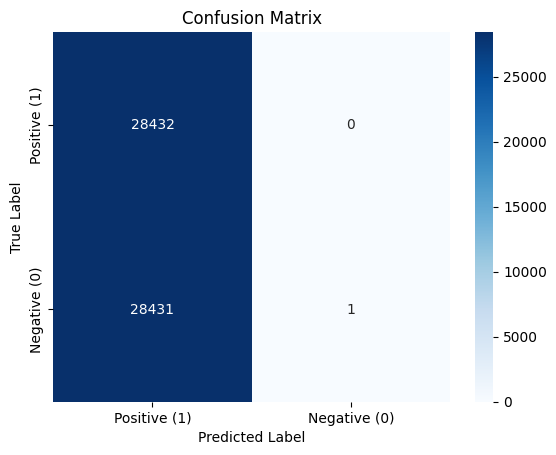

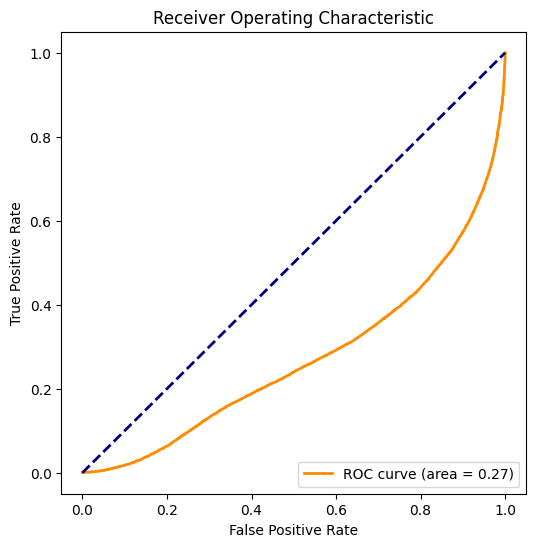

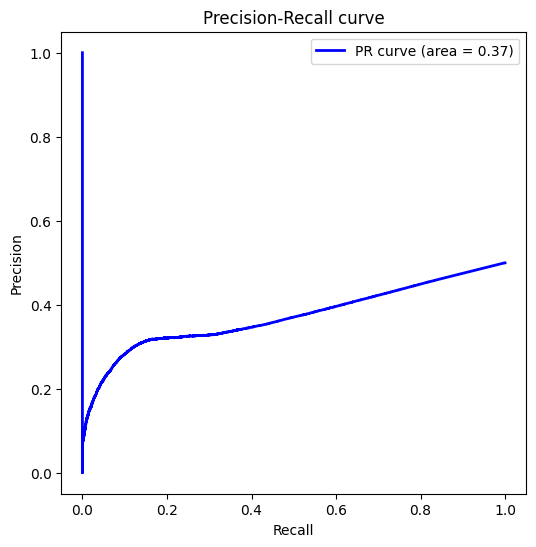

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     28432
           1       0.50      1.00      0.67     28432

    accuracy                           0.50     56864
   macro avg       0.75      0.50      0.33     56864
weighted avg       0.75      0.50      0.33     56864



{'precision': 0.5000087930640311,
 'recall': 1.0,
 'f1_score': 0.6666744826777654,
 'mcc': 0.004193581770060594}

In [45]:
from evaluation import ModelEvaluator

evaluator = ModelEvaluator(y_test, y_pred, realness_scores)
evaluator.full_report()

# OC-NN (One Class Neural Network)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class OneClassNN(nn.Module):
    def __init__(self, input_dim):
        super(OneClassNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.fc(x)

def ocnn_loss(output, nu=0.1):
    """
    Custom loss function for OC-NN which aims to separate the positive class from the origin.
    `nu` is a hyperparameter that controls the regularization.
    """
    return nu * torch.mean(torch.max(torch.zeros_like(output), -output)) + (1 - nu) * torch.mean(output)


In [13]:
# Model, optimizer, and hyperparameters
input_dim = X_train.shape[1]
model = OneClassNN(input_dim)

In [14]:
# using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [15]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for data in train_loader:  # Assuming train_loader is defined and contains normal data
        inputs, _ = data
        inputs = inputs.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = ocnn_loss(outputs)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

Epoch 1/20, Loss: -95.76040649414062
Epoch 2/20, Loss: -333.74432373046875
Epoch 3/20, Loss: -688.0923461914062
Epoch 4/20, Loss: -1162.311767578125
Epoch 5/20, Loss: -1719.5556640625
Epoch 6/20, Loss: -2260.676513671875
Epoch 7/20, Loss: -3004.342529296875
Epoch 8/20, Loss: -3853.9384765625
Epoch 9/20, Loss: -4752.33251953125
Epoch 10/20, Loss: -5595.1611328125
Epoch 11/20, Loss: -6725.8896484375
Epoch 12/20, Loss: -7540.40966796875
Epoch 13/20, Loss: -8701.5625
Epoch 14/20, Loss: -10309.5888671875
Epoch 15/20, Loss: -11323.0224609375
Epoch 16/20, Loss: -12335.525390625
Epoch 17/20, Loss: -14181.701171875
Epoch 18/20, Loss: -15948.00390625
Epoch 19/20, Loss: -17376.8984375
Epoch 20/20, Loss: -18203.0703125


In [17]:
# Evaluation on test data
model.eval()
with torch.no_grad():
    test_outputs = model(torch.Tensor(X_test).to(device))
    test_scores = test_outputs.cpu().numpy()

In [24]:
test_scores = np.reshape(test_scores, -1)

In [25]:
# Set a threshold for anomaly detection
threshold = np.quantile(test_scores, 0.95)  # Adjust based on your dataset

# Classify as anomaly if the score is below the threshold
y_pred = (test_scores < threshold).astype(int)

# Evaluate the performance (e.g., using F1-score, precision, recall)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28432
           1       0.47      0.90      0.62     28432

    accuracy                           0.45     56864
   macro avg       0.24      0.45      0.31     56864
weighted avg       0.24      0.45      0.31     56864



In [27]:
import numpy as np
from sklearn.metrics import f1_score

best_f1 = 0
best_threshold = 0
#c = 0

# Iterate over a range of possible thresholds
for threshold in np.linspace(min(test_scores), max(test_scores), num=1000):
    #print(c)
    #c = c + 1
    
    # Predict anomalies based on the threshold
    y_pred = (test_scores > threshold).astype(int)
    
    # Calculate F1 score
    current_f1 = f1_score(y_test, y_pred)
    
    # Update the best threshold if current F1 score is higher
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

threshold = best_threshold

Best Threshold: -11383.419908678217
Best F1 Score: 0.9040638550980467


In [29]:
# Classify as anomaly if the score is below the threshold
y_pred = (test_scores > threshold).astype(int)

# Evaluate the performance (e.g., using F1-score, precision, recall)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     28432
           1       0.99      0.83      0.90     28432

    accuracy                           0.91     56864
   macro avg       0.92      0.91      0.91     56864
weighted avg       0.92      0.91      0.91     56864



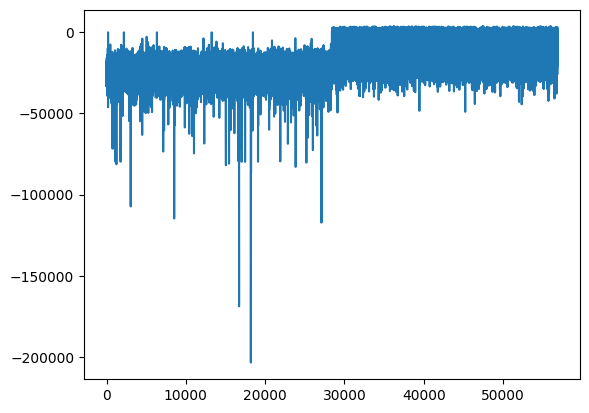

In [22]:
plt.plot(test_scores)

# OCNN from repository
inspired from source: https://github.com/sgsuh/oc-nn-pytorch/blob/master/oc_nn.py

In [104]:
import torch
import torch.nn as nn
import torch.optim as optim

class OC_NN(nn.Module):
    def __init__(self, input_dim):
        super(OC_NN, self).__init__()
        
        self.dense_out1 = nn.Linear(input_dim, 16)
        self.out2 = nn.Linear(16, 1)
        
    def forward(self, x):
        w1 = self.dense_out1(x)
        w2 = self.out2(w1)
        
        return w1, w2

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim

class OC_NN(nn.Module):
    def __init__(self, input_dim):
        super(OC_NN, self).__init__()
        
        self.dense_out1 = nn.Linear(input_dim, 16)
        self.out2 = nn.Linear(16, 1)
        
    def forward(self, x):
        w1 = nn.ReLU()(self.dense_out1(x))
        w2 = nn.ReLU()(self.out2(w1))
        
        return w1, w2

In [140]:
# Model, optimizer, and hyperparameters
input_dim = X_train.shape[1]
model = OC_NN(input_dim)

In [141]:
# using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

### not working!

In [24]:
import torch.nn.functional as F

nu = 0.04

def nnscore(x, w, v):
    return torch.matmul(torch.matmul(x, w), v)

def ocnn_loss(theta, x, nu, w1, w2, r):
    term1 = 0.5 * torch.sum(w1**2)
    term2 = 0.5 * torch.sum(w2**2)
    term3 = 1/nu * torch.mean(F.relu(r - nnscore(x, w1, w2)))
    term4 = -r
    
    return term1 + term2 + term3 + term4

In [107]:
import torch.nn.functional as F

nu = 0.04

def nnscore(x, model):
    # Extract the weights and biases
    w1, b1 = model.dense_out1.weight, model.dense_out1.bias
    w2, b2 = model.out2.weight, model.out2.bias

    # Forward pass through the network
    h1 = torch.matmul(x, w1.t()) + b1
    output = torch.matmul(h1, w2.t()) + b2
    
    return output

def ocnn_loss(x, nu, model, r):
    w1 = model.dense_out1.weight
    w2 = model.out2.weight
    term1 = 0.5 * torch.sum(w1**2)
    term2 = 0.5 * torch.sum(w2**2)
    term3 = 1/nu * torch.mean(F.relu(r - nnscore(x, model)))
    term4 = -r
    
    return term1 + term2 + term3 + term4

In [83]:
import torch.nn.functional as F

nu = 0.04

def nnscore(x, model):
    # Extract the weights and biases
    w1, b1 = model.dense_out1.weight, model.dense_out1.bias
    w2, b2 = model.out2.weight, model.out2.bias

    # Forward pass through the network
    h1 = torch.matmul(x, w1.t()) + b1
    output = torch.matmul(h1, w2.t()) + b2
    
    return output

def ocnn_loss(x, nu, model, r):
    w1 = model.dense_out1.weight
    w2 = model.out2.weight
    term1 = 0.5 * torch.sum(w1**2)
    term2 = 0.5 * torch.sum(w2**2)
    term3 = 1/nu * torch.mean(F.relu(r - nnscore(x, model)))
    term4 = -r
    
    if torch.any(term1<0):
        print("Term 1 negative")
    if torch.any(term2<0):
        print("Term 2 negative")
    if torch.any(term3<0):
        print("Term 3 negative")
    if torch.any(term4<0):
        print("Term 4 negative")
    
    return term1 + term2 + term3 + term4

In [119]:
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [142]:
# Before the training loop, initialize r
r = torch.tensor(-1.0, requires_grad=True, device=device)

# Inside your training loop
for epoch in range(num_epochs):
    model.train()
    for data in train_loader:
        inputs, _ = data
        inputs = inputs.to(device)
        optimizer.zero_grad()

        # Forward pass through the model
        _, output = model(inputs)  # output of the model
        
        # Calculate loss
        loss = ocnn_loss(inputs, nu, model, r)
        loss = loss.mean()
          
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Update r using the detached output (to avoid inplace modification)
        with torch.no_grad():
            r_updated = torch.quantile(output.detach(), 
                                       q=nu,
                                       interpolation='linear')

    # Update r for the next epoch (outside the inner loop)
    r.data = r_updated.data

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

RuntimeError: quantile() q must be in the range [0, 1] but got 4

In [123]:
# Inside your training loop
for epoch in range(num_epochs):
    model.train()
    for data in train_loader:
        inputs, _ = data
        inputs = inputs.to(device)
        optimizer.zero_grad()

        # Forward pass through the model
        _, output = model(inputs)  # output of the model
        r = torch.quantile(output, nu) # r = 0.05 # r = nnscore(inputs, model)  # pass original inputs to nnscore
        print(r)
        # Calculate loss
        loss = ocnn_loss(inputs, nu, model, r)
        loss = loss.mean()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

tensor(12.3213, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2256, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2348, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2547, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2382, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2852, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.3107, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2211, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2830, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.3005, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2252, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2880, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2350, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2306, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2775, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.3082, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.2306, device='

tensor(12.7028, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.7799, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.7472, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.8260, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.7712, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.7319, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.7285, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.7779, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.7762, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.7189, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.8077, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.7836, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.7211, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.7520, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.8146, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.6728, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(12.8134, device='

tensor(13.2400, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.1273, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.1290, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.2169, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.1846, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.2483, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.2507, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.1613, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.2424, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.2989, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.3129, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.2309, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.2347, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.2296, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.1751, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.1197, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.2941, device='

tensor(13.6998, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.7255, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.7385, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.7500, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.5928, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.7422, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.7694, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.8872, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.9004, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.7795, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.6934, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.7104, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.7978, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.8597, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.8689, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.7626, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(13.7399, device='

tensor(14.3369, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.4312, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3458, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.2257, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3476, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3768, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3523, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3145, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3235, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3160, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3262, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3804, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3416, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3848, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3507, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3483, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.3165, device='

tensor(14.8683, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.9448, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.8500, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.0050, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.9673, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.9589, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.8831, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.8724, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.8348, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.8803, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.0975, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.9616, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.7992, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.9687, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.8658, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.9282, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(14.8838, device='

tensor(15.4676, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.6407, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.5304, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.5175, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.5227, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.4861, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.4766, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.5605, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.5645, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.5342, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.3893, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.4449, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.4666, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.5985, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.5458, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.5527, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(15.4762, device='

tensor(16.1890, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.1021, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.2532, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.2189, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.1537, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.0875, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.1470, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.0788, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.2258, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.1863, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.0042, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.0728, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.1571, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.1203, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.1695, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.1432, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.2148, device='

tensor(16.7728, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.8447, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.8655, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.8168, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.7917, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.7356, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.7284, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.5713, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.7033, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.8985, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.7995, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.7289, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.6843, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.7620, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.7580, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.7350, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(16.9017, device='

tensor(17.5207, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.4909, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.5093, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.4819, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.3190, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.4768, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.4391, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.3912, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.4081, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.5017, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.3891, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.4104, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.5025, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.5229, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.5361, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.2568, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.5965, device='

tensor(18.1071, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.1160, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.1448, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.2219, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.0985, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.0734, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.0688, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.1546, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.1839, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(17.9998, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.1560, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.1356, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.0831, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.1893, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.1283, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.0695, device='cuda:0', grad_fn=<SqueezeBackward3>)
tensor(18.0649, device='

KeyboardInterrupt: 

In [132]:
# Evaluation on test data
model.eval()
with torch.no_grad():
    _, test_outputs = model(torch.Tensor(X_test).to(device))
    test_scores = test_outputs.cpu().numpy()

In [133]:
test_scores

array([[ 19.375687 ],
       [ 18.608139 ],
       [ 18.242016 ],
       ...,
       [  6.839692 ],
       [  6.9996758],
       [-11.148389 ]], dtype=float32)

In [134]:
test_scores = np.reshape(test_scores, -1)

## Histogram of decision scores (looks really good!)

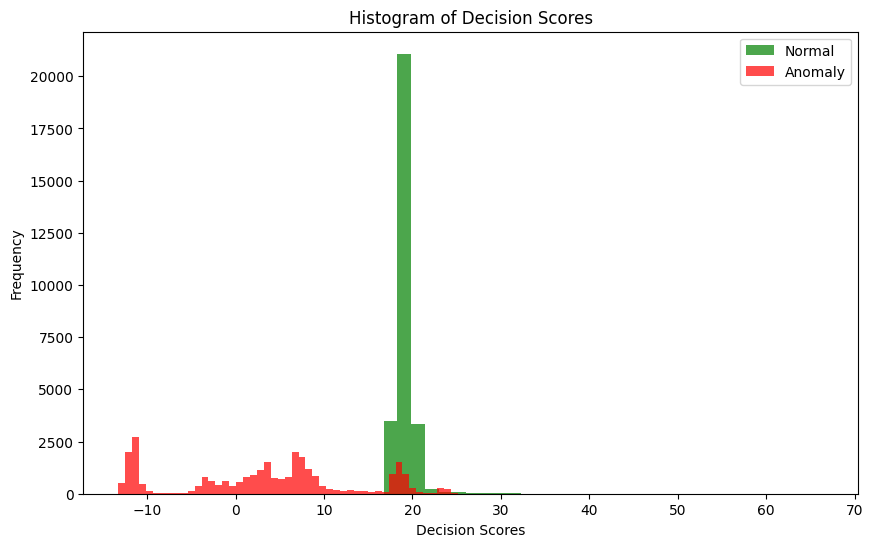

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test contains the true labels (0 for normal, 1 for anomaly)
normal_scores = test_scores[y_test == 0]
anomaly_scores = test_scores[y_test == 1]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(normal_scores, bins=50, alpha=0.7, label='Normal', color='green')
plt.hist(anomaly_scores, bins=50, alpha=0.7, label='Anomaly', color='red')
plt.xlabel('Decision Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Decision Scores')
plt.legend()
plt.show()


## Thresholding

In [137]:
import numpy as np
from sklearn.metrics import f1_score

best_f1 = 0
best_threshold = 0
#c = 0

# Iterate over a range of possible thresholds
for threshold in np.linspace(min(test_scores), max(test_scores), num=1000):
    #print(c)
    #c = c + 1
    
    # Predict anomalies based on the threshold
    y_pred = (test_scores < threshold).astype(int)
    
    # Calculate F1 score
    current_f1 = f1_score(y_test, y_pred)
    
    # Update the best threshold if current F1 score is higher
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

threshold = best_threshold

Best Threshold: 17.93488657725108
Best F1 Score: 0.923524007724469


### best threshold leads to 94% f1 score

In [138]:
# Classify as anomaly if the score is below the threshold
y_pred = (test_scores < threshold).astype(int)

# Evaluate the performance (e.g., using F1-score, precision, recall)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     28432
           1       0.99      0.87      0.92     28432

    accuracy                           0.93     56864
   macro avg       0.93      0.93      0.93     56864
weighted avg       0.93      0.93      0.93     56864



### however usually you say above 0 normal data points, below anomalies (88% F1 score)
- this should be the case if the model correctly converges

In [136]:
# Classify as anomaly if the score is below the threshold
y_pred = (test_scores <= 0).astype(int)

# Evaluate the performance (e.g., using F1-score, precision, recall)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     28432
           1       1.00      0.33      0.49     28432

    accuracy                           0.66     56864
   macro avg       0.80      0.66      0.62     56864
weighted avg       0.80      0.66      0.62     56864



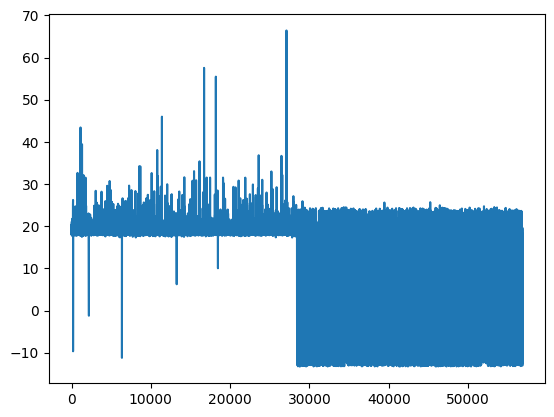

In [139]:
plt.plot(test_scores)

# OCNN (clean)
- see paper: https://arxiv.org/abs/1802.06360
- implementation inspired from two sources:
    - https://github.com/danielenricocahall/One-Class-NeuralNetwork/tree/master (tensorflow)
    - https://github.com/sgsuh/oc-nn-pytorch/tree/master (pytorch)
- Note: loss function is unbounded! it can get arbitrarily negative

In [143]:
import torch
import torch.nn as nn
import torch.optim as optim

class OneClassNN(nn.Module):
    def __init__(self, input_dim, hidden_layer_size, activation_func=nn.Sigmoid):
        """
        Initialize the One Class Neural Network.
        :param input_dim: The number of input features.
        :param hidden_layer_size: The number of neurons in the hidden layer.
        :param activation_func: The activation function to use in the hidden layer.
        """
        super(OneClassNN, self).__init__()
        self.dense_out1 = nn.Linear(input_dim, hidden_layer_size)
        self.out2 = nn.Linear(hidden_layer_size, 1)
        self.activation_func = activation_func()

    def forward(self, x):
        """
        Forward pass of the network.
        :param x: Input tensor.
        :return: Output tensor after passing through the network.
        """
        x = self.activation_func(self.dense_out1(x))
        return self.out2(x)

    
def quantile_loss(r, y_hat, nu):
    """
    3rd term in Eq (4) of the original paper
    :param r: bias of hyperplane
    :param y_hat: data / output we're operating on
    :param nu: parameter between [0, 1] controls trade-off between maximizing the distance of the hyperplane from
        the origin and the number of data points permitted to cross the hyper-plane (false positives) (default 1e-2)
    :return: the loss function value
    """
    return (1 / nu) * torch.mean(torch.relu(r - y_hat)) - r


def custom_ocnn_loss(model, r, nu):
    """
    Compute the OC-NN loss.
    :param y_hat: The predicted values from the model.
    :return: The computed loss value.
    """
    def loss(y_hat):
        w1_norm = 0.5 * torch.norm(model.dense_out1.weight)**2
        w2_norm = 0.5 * torch.norm(model.out2.weight)**2
        q_loss = quantile_loss(r, y_hat, nu)
        return w1_norm + w2_norm + q_loss
    return loss

## Parameters

In [229]:
input_dim = X_train.shape[1] 
hidden_layer_size = 16
init_lr = 1e-4
epochs = 20
r = 1.0

## Very important!:
The optimal value of parameter $\nu \in [0; 1]$ which is equivalent to the percentage of anomalies for each data set, is set according to respective outlier proportions.

Its like the contamination factor in Local Outlier Factor.

r which will be the decision threshold, will be the $\nu$ quantile of the scores in the training data (so in our case it should be pretty low, because we have no anomalies)

In [245]:
nu = 0.001

## Model definition and optimizer

In [ ]:
# Model and Optimizer
model = OneClassNN(input_dim, hidden_layer_size)
optimizer = optim.SGD(model.parameters(), lr=init_lr)

In [246]:
# Model and Optimizer
model = OneClassNN(input_dim, hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=init_lr)

## Training procedure

In [247]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training Loop
for epoch in range(epochs):
    model.train()
    for data in train_loader:  # Assuming train_loader yields batches of data
        inputs, _ = data
        inputs = inputs.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = custom_ocnn_loss(model, r, nu)(outputs)
        loss.backward()
        optimizer.step()

        # Update r based on quantile of outputs
        with torch.no_grad():
            r = torch.quantile(outputs, nu).item()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/20, Loss: 1.8705476522445679
Epoch 2/20, Loss: 1.0642120838165283
Epoch 3/20, Loss: 0.3579428195953369
Epoch 4/20, Loss: -0.3183373212814331
Epoch 5/20, Loss: -0.7530092000961304
Epoch 6/20, Loss: -1.199886441230774
Epoch 7/20, Loss: -1.5353178977966309
Epoch 8/20, Loss: -1.7878926992416382
Epoch 9/20, Loss: -1.8227896690368652
Epoch 10/20, Loss: -2.415320873260498
Epoch 11/20, Loss: -2.6304736137390137
Epoch 12/20, Loss: -2.8614749908447266
Epoch 13/20, Loss: -3.141165256500244
Epoch 14/20, Loss: -2.869029998779297
Epoch 15/20, Loss: -3.4916224479675293
Epoch 16/20, Loss: 6.399104595184326
Epoch 17/20, Loss: 1.7832131385803223
Epoch 18/20, Loss: -3.946493148803711
Epoch 19/20, Loss: -3.917904853820801
Epoch 20/20, Loss: -4.206930160522461


### remember: decision function is $S_n = sgn(y_n - r)$

In [248]:
r

11.493119239807129

### train scores

In [249]:
# Evaluation on test data
model.eval()
with torch.no_grad():
    train_outputs = model(torch.Tensor(X_train).to(device))
    train_scores = train_outputs.cpu().numpy()
train_scores

array([[11.951442],
       [11.653323],
       [11.509469],
       ...,
       [11.498319],
       [11.564055],
       [11.688056]], dtype=float32)

In [250]:
train_scores = np.reshape(train_scores, -1)

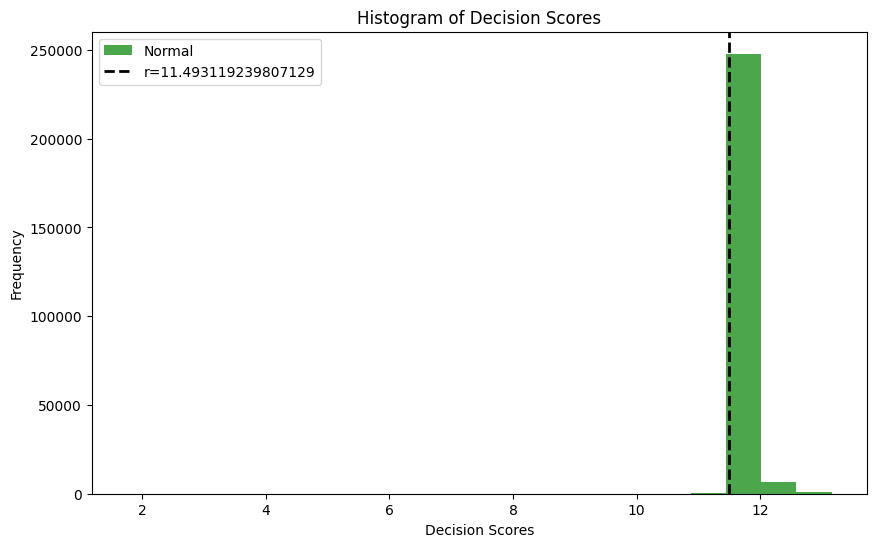

In [251]:
import matplotlib.pyplot as plt
import numpy as np

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(train_scores, bins=20, alpha=0.7, label='Normal', color='green')
plt.axvline(r, color='black', linestyle='dashed', linewidth=2, label=f'r={r}')
plt.xlabel('Decision Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Decision Scores')
plt.legend()
plt.show()

### test scores

In [252]:
# Evaluation on test data
model.eval()
with torch.no_grad():
    test_outputs = model(torch.Tensor(X_test).to(device))
    test_scores = test_outputs.cpu().numpy()
test_scores

array([[11.756007 ],
       [11.620643 ],
       [11.549551 ],
       ...,
       [ 7.516195 ],
       [ 7.6010847],
       [ 1.7302694]], dtype=float32)

In [253]:
test_scores = np.reshape(test_scores, -1)

## Histogram of decision scores (looks really good!)



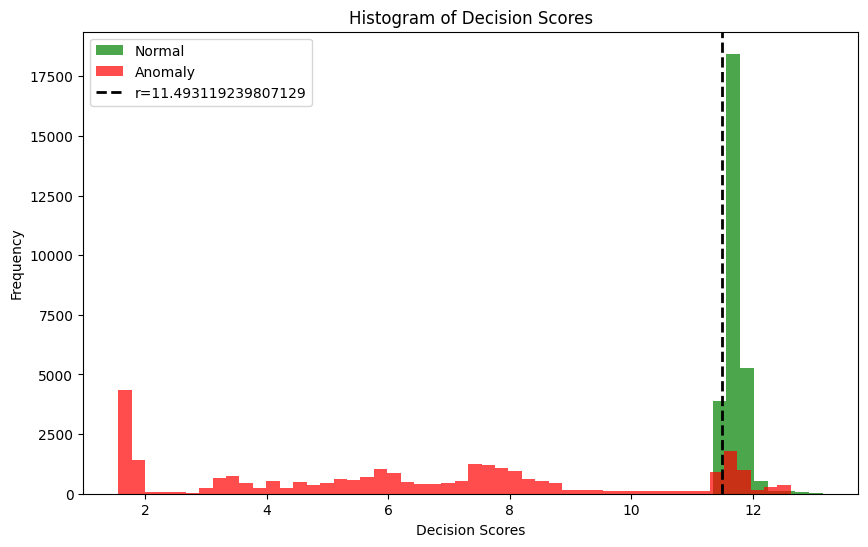

In [254]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test contains the true labels (0 for normal, 1 for anomaly)
normal_scores = test_scores[y_test == 0]
anomaly_scores = test_scores[y_test == 1]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(normal_scores, bins=50, alpha=0.7, label='Normal', color='green')
plt.hist(anomaly_scores, bins=50, alpha=0.7, label='Anomaly', color='red')
plt.axvline(r, color='black', linestyle='dashed', linewidth=2, label=f'r={r}')
plt.xlabel('Decision Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Decision Scores')
plt.legend()
plt.show()

## Thresholding wrt to OCNN

In [255]:
threshold = r
threshold

11.493119239807129

In [256]:
# Classify as anomaly if the score is below the threshold
y_pred = (test_scores < threshold).astype(int)

# Evaluate the performance (e.g., using F1-score, precision, recall)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     28432
           1       0.99      0.87      0.92     28432

    accuracy                           0.93     56864
   macro avg       0.93      0.93      0.93     56864
weighted avg       0.93      0.93      0.93     56864



## Explainability

## model saving 

In [257]:
torch.save(model.state_dict(), 'best_ocnn2.pth')